In [2]:
from datetime import date, timedelta, datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn-v0_8-whitegrid")

est_price_path = './Data/est_prices.csv'
df = pd.read_csv(est_price_path, index_col=0)

#df = df[df['symbol'] == 'AAPL']
df_filtered = df[df.lastPrice > 10]
df_one = df_filtered[df_filtered.BS_perc_error >= 0.9]
#df_filtered.sort_values('BIN_perc_error')
df_filtered.head()

,symbol,optionType,expiration,strike,lastPrice,lastTradeDate,inTheMoney,maturity,S0,sigma,returns,method,LSMC_est_price,LSMC_perc_error,BIN_est_price,BIN_perc_error,BS_est_price,BS_perc_error,MJD_est_price,MJD_perc_error
0,AAPL,calls,2023-11-24,50.0,141.35,2023-11-20,True,4,191.449997,0.331585,0.270528,A,141.740277,-0.002761,141.479194,-0.000914,NaN,NaN,NaN,NaN
1,AAPL,calls,2023-11-24,110.0,81.50,2023-11-20,True,4,191.449997,0.331585,0.270528,A,81.828874,-0.004035,81.514230,-0.000175,NaN,NaN,NaN,NaN
2,AAPL,calls,2023-11-24,140.0,51.78,2023-11-20,True,4,191.449997,0.331585,0.270528,A,52.008087,-0.004405,51.531748,0.004794,NaN,NaN,NaN,NaN
3,AAPL,calls,2023-11-24,145.0,46.85,2023-11-20,True,4,191.449997,0.331585,0.270528,A,46.887446,-0.000799,46.534668,0.006731,NaN,NaN,NaN,NaN
4,AAPL,calls,2023-11-24,167.5,23.46,2023-11-20,True,4,191.449997,0.331585,0.270528,A,24.338945,-0.037466,24.047807,-0.025056,NaN,NaN,NaN,NaN


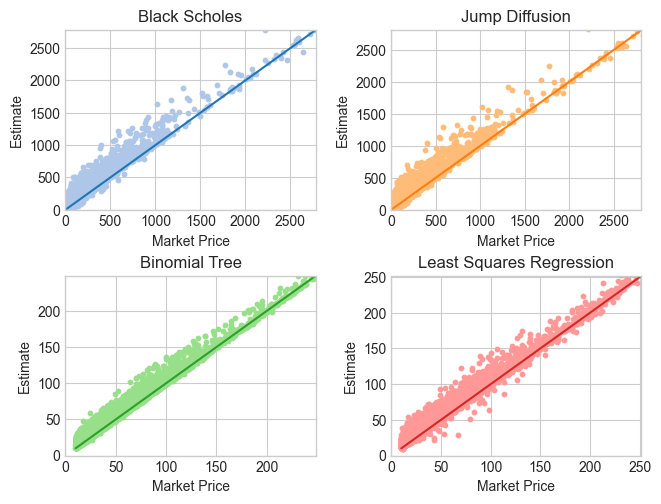

In [3]:
import seaborn as sns
palette = sns.color_palette("tab20", 20)
palette

fig, axis = plt.subplots(2, 2) 
fig.tight_layout(h_pad=3, w_pad=3)
df_EU = df_filtered[df_filtered.method == 'E']
df_A = df_filtered[df_filtered.method == 'A']
x = np.linspace(min(df_EU.lastPrice), max(df_EU.lastPrice))
y = np.linspace(min(df_A.lastPrice), max(df_A.lastPrice))
# BS plot
axis[0,0].scatter(df_EU.lastPrice, df_EU.BS_est_price, color = palette[1], s=10)
axis[0,0].plot(x,x, color = palette[0])
axis[0,0].set_ylabel("Estimate") 
axis[0,0].set_xlabel("Market Price") 
axis[0,0].set_title("Black Scholes")
axis[0,0].set_ylim(0, np.quantile(df_EU.BS_est_price, 0.998))
axis[0,0].set_xlim(0, np.quantile(df_EU.BS_est_price, 0.998))

# JD plot
axis[0,1].scatter(df_EU.lastPrice, df_EU.MJD_est_price, color = palette[3], s=10)
axis[0,1].plot(x,x, color = palette[2])
axis[0,1].set_ylabel("Estimate") 
axis[0,1].set_xlabel("Market Price") 
axis[0,1].set_title("Jump Diffusion") 
axis[0,1].set_ylim(0, top = np.quantile(df_EU.MJD_est_price, 0.998))
axis[0,1].set_xlim(0, right = np.quantile(df_EU.MJD_est_price, 0.998))

# BIN plot
axis[1,0].scatter(df_A.lastPrice, df_A.BIN_est_price, color = palette[5], s=10)
axis[1,0].plot(y,y, color = palette[4])
axis[1,0].set_ylabel("Estimate") 
axis[1,0].set_xlabel("Market Price") 
axis[1,0].set_title("Binomial Tree") 
axis[1,0].set_ylim(0, np.quantile(df_A.BIN_est_price, 0.99))
axis[1,0].set_xlim(0, np.quantile(df_A.BIN_est_price, 0.99))

# LSMC plot
axis[1,1].scatter(df_A.lastPrice, df_A.LSMC_est_price, color = palette[7], s=10)
axis[1,1].plot(y,y,color = palette[6])
axis[1,1].set_ylabel("Estimate") 
axis[1,1].set_xlabel("Market Price") 
axis[1,1].set_title("Least Squares Regression") 
axis[1,1].set_ylim(0, np.quantile(df_A.LSMC_est_price, 0.99))
axis[1,1].set_xlim(0, np.quantile(df_A.LSMC_est_price, 0.99))
fig.savefig('./Presentation files/MC_accuracy.png', dpi = 300)

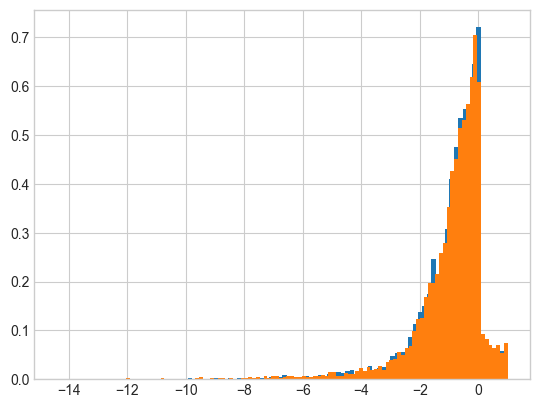

2.5784395228831927 2.5851904516814357


In [9]:
plt.hist(df_filtered.MJD_perc_error, bins=100, density = True)
plt.hist(df_filtered.BS_perc_error, bins=100, density = True)
#plt.hist(BIN_error, bins=100)
plt.show()
mseBS = np.mean((df_filtered.BS_perc_error)**2)
mseMJD = np.mean((df_filtered.MJD_perc_error)**2)
print(mseBS, mseMJD)

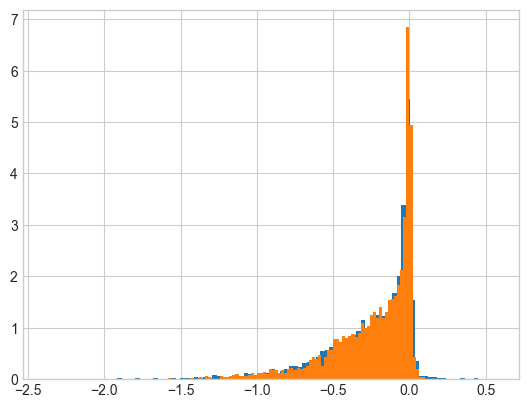

0.13162509482502183 0.15595201950643692


In [8]:
plt.hist(df_filtered.LSMC_perc_error, bins=100, density=True)
plt.hist(df_filtered.BIN_perc_error, bins=100, density=True)
#plt.hist(BIN_error, bins=100)
plt.show()
mseBIN = np.mean((df_filtered.BIN_perc_error)**2)
mseLSMC = np.mean((df_filtered.LSMC_perc_error)**2)
print(mseBIN, mseLSMC)